<div dir='rtl'>
<h1>پروژه سوم علوم اعصاب محاسباتی</h1>
<br/>
    - صورت پروژه در 
    <a href="https://cnrl.github.io/cns-project-template/Phase3.html">این آدرس</a>
    قابل مشاهده است.
<br/>
    - <font color='red'>با توجه به دشواری حفظ ساختار صورت پروژه در گزارش، آن ساختار نادیده گرفته شده و
    مطالب با ساختاری مناسب برای دنبال کردن نمودار‌ها و مطالب منظم شده‌اند؛ با اینحال تمام مطالب خواسته شده
    در صورت پروژه، در این گزارش پوشانده شده‌اند.</font>
<br/>
    - در فاز‌های قبل به بررسی پارامتر‌های نورون‌ها پرداختیم. بنابراین در این فاز این پارامتر‌ها را مورد بررسی قرار نخواهیم داد و بر روی پارامتر‌های اتصالات تمرکز خواهیم کرد.
<br/>
    - در این فاز توانایی پنهان کردن کد‌ها در ژوپیتر نوت‌بوک را پیدا نکردیم. این اصلاح در فاز‌های بعدی انجام خواهد شد.
<br/>
    - در این فاز از جامعه ناهمگن استفاده خواهیم کرد.
</div>

<div dir='rtl'>
<h2>0. فهرست مطالب</h2>
<ol>
    <li><a href="#1">شدت جریان ورودی</a></li>
    <li><a href="#2">نوع و تعداد اتصالات</a></li>
    <li><a href="#3">مقدار‌دهی وزن‌های اتصالات</a></li>
    <li><a href="#4">تغییرات ثابت‌زمانی $tau_s$</a></li>
</ol>
</div>

In [1]:
from cnsproject.network.neural_populations import LIFPopulation
from cnsproject.network.connections import *
from cnsproject.network.monitors import Monitor
from cnsproject.plotting.plotting import Plotter
from cnsproject.utils import *
import matplotlib.pyplot as plt
import torch
import warnings
warnings.filterwarnings("ignore")

<div dir='rtl'>
<br/>
بجز ابزار شبیه‌سازی (که import شده‌اند)، تابع پایین در این تمرین خاص، برای شبیه‌سازی و مقایسه نورون‌ها در کنار هم به ما کمک خواهد کرد. همچنین در این تمرین، هر شبیه‌سازی را به مدت 200ms ادامه خواهیم داد.
</div>

In [22]:
time=250 #ms
def population_behaviour(population_cls, I, p, time=time, postfix='', dt=1., cd=True, name='', **args):
    is_excitatory = torch.ones(100, dtype=bool)
    is_excitatory[:20] = False
    population = population_cls((100,), is_excitatory=is_excitatory, dt=dt, **args)
    connection = SimpleConnection(pre=population, post=population, dt=dt, **args)
    monitor = Monitor(population, state_variables=["s"], time=time)
    population.refractory_and_reset()
    def func(I):
        population.forward(I+connection.I)
        connection.forward(population.s)
    monitor.simulate(func, {'I': I})
    p.monitor = monitor
    data = p.population_activity_raster('s'+postfix, x_vis=False, y_label='spikes', title=name)
    p.population_activity('a'+postfix, raster_data=data, x_vis=False, y_label="activity")
    if cd:
        p.current_dynamic('i'+postfix, I=I, y_label="I (mA)", repeat_till=time)

<a id='1'></a>
<div dir='rtl'>
<h2>1. شدت جریان ورودی</h2>
    <br/>
    در نمودار‌های زیر، سه نمونه جریان تصادفی تولید و رفتار جمعیت رسم شده است:
</div>

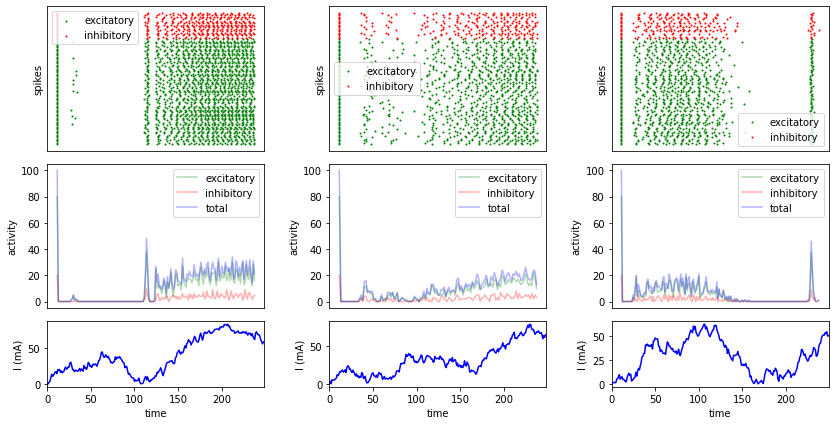

In [23]:
plt.figure(figsize=(14,7))
p = Plotter([
    ['s1','s2','s3'],
    ['s1','s2','s3'],
    ['a1','a2','a3'],
    ['a1','a2','a3'],
    ['i1','i2','i3'],
], wspace=0.3)

def run(j):
    I = [0]
    for i in range(time-1):
        I.append(abs(I[-1]+np.random.normal(.1, 3)))
    population_behaviour(LIFPopulation, I, p, postfix=str(j),
                         w=norm_weights,
                         connectivity=internal_rfnopp_connectivity,
                         wmean=50.,
                         wstd=5.,
                         connections_rate=.1)
for i in range(1,4):
    run(i)
p.show()

<div dir='rtl'>
<br/>
همانطور که مشاهده می‌شود و همانطور که در بررسی رفتار تک نورون دیدیم، فعالیت جمعیت نورونی رابطه‌ی مستقیم با جریان ورودی دارد؛ هرچه جریان ورودی قوی‌تر باشد، فعالیت جمعیت نیز بیشتر خواهد شد. نکته قابل توجه در نمودار‌های بالا آن است که نمودار فعالیت جامعه همواره از ۱۰۰ شروع می‌شود. باید دقت شود که نقطه شروع این نمودار، لحظه صفر نیست. نکته آن است که با توجه به یکسان بودن ویژگی‌های ساختاری تمام نورون‌های جامعه (که می‌توانست اینگونه نباشد)، قبل از اولین فعالیت جامعه، همه نورون‌ها شاهد جریان ورودی یکسان و درنتیجه اختلاف پتانسیل یکسان هستند و در یک لحظه‌ی خاص، همگی با هم فعال می‌شوند. از آن پس به دلیل وجود تفاوت در اتصالات و وزن اتصالات، همگامی نورون‌ها از بین رفته و شبکه حالت تصادفی پیدا می‌کند. همچنین است برای زمانی که مدتی هیچ نورونی فعالیت نمی‌کند.
</div>

<a id='2'></a>
<div dir='rtl'>
    <h2>2. نوع و تعداد اتصالات</h2>
</div>

rfcpc: random fixed coupling prob connectivity

rfnopp: random fixed number of presynaptic partners connectivity

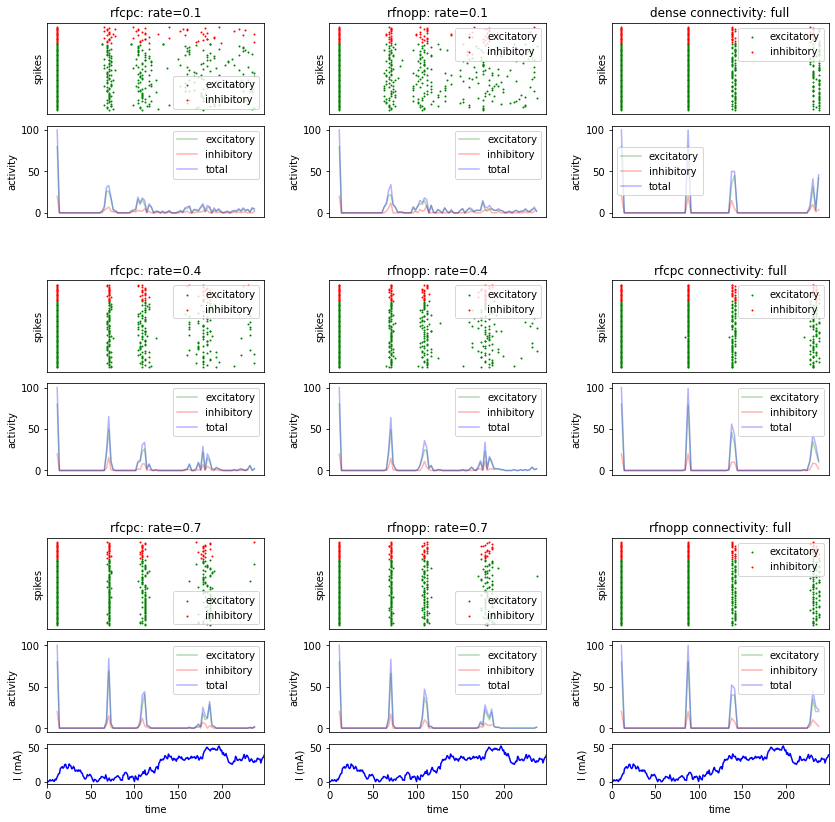

In [24]:
plt.figure(figsize=(14,14))
p = Plotter([
    ['s11','s21','s31'],
    ['s11','s21','s31'],
    ['a11','a21','a31'],
    ['a11','a21','a31'],
    [None,None,None],
    ['s12','s22','s32'],
    ['s12','s22','s32'],
    ['a12','a22','a32'],
    ['a12','a22','a32'],
    [None,None,None],
    ['s13','s23','s33'],
    ['s13','s23','s33'],
    ['a13','a23','a33'],
    ['a13','a23','a33'],
    ['i13','i23','i33'],
], wspace=0.3, hspace=0.3)
I = [0]
for i in range(time-1):
    I.append(abs(I[-1]+np.random.normal(.1, 3)))

for i,(k,v) in enumerate({"dense connectivity":internal_dense_connectivity,
                         "rfcpc connectivity":internal_rfcpc_connectivity,
                         "rfnopp connectivity":internal_rfnopp_connectivity}.items()):
    population_behaviour(LIFPopulation, I, p, postfix='3'+str(i+1), name=k+": full", cd=(i==2),
                         w=norm_weights,
                         wmean=20.,
                         wstd=5.,
                         connectivity=v,
                         connections_rate=1)
for i,r in enumerate([.1,.4,.7]):
    population_behaviour(LIFPopulation, I, p, postfix='1'+str(i+1), name=f"rfcpc: rate={r}", cd=(i==2),
                         w=norm_weights,
                         wmean=20.,
                         wstd=5.,
                         connectivity=internal_rfcpc_connectivity,
                         connections_rate=r)
for i,r in enumerate([.1,.4,.7]):
    population_behaviour(LIFPopulation, I, p, postfix='2'+str(i+1), name=f"rfnopp: rate={r}", cd=(i==2),
                         w=norm_weights,
                         wmean=20.,
                         wstd=5.,
                         connectivity=internal_rfnopp_connectivity,
                         connections_rate=r)

p.show()

<div dir='rtl'>
<br/>
مشخص است که حالت dense و حالات اتصالات ۱۰۰ درصدی تفاوتی ندارند و نباید داشته باشند. تفاوت جزئی موجود به دلیل محاسبه تصادفی وزن‌های اتصالات می‌باشد.
<br/>
    مشاهده می‌شود که دو نوع اتصال 
    rfcpc و rfnopp
    تفاوت کمی دارند. دلیل این مسئله تعداد زیاد نورون‌های جمعیت است که باعث می‌شود، مطابق با اصل حد مرکزی، این دو نوع اتصال به وضعیت مشابهی برسند. با اینحال تفاوت جزئی وجود دارد و مشاهده می‌شود که در اتصال
    rfnopp
    زمان اسپایک‌ها پخش‌تر است.
<br/>
    همچنین مشاهده می‌شود که با افزایش درصد برقراری اتصالات، نورون‌ها همگام‌تر شده و همزمان اسپایک می‌زنند. دلیل آن است که با افزایش اتصالات، تأثیر جریان ورودی به شکل منظم‌تری در شبکه پخش شده و درنتیجه، نورون‌ها شرایط مشابهی را تجربه می‌کنند.
</div>

<a id='3'></a>
<div dir='rtl'>
<h2>3. مقدار‌دهی وزن‌های اتصالات</h2>
</div>

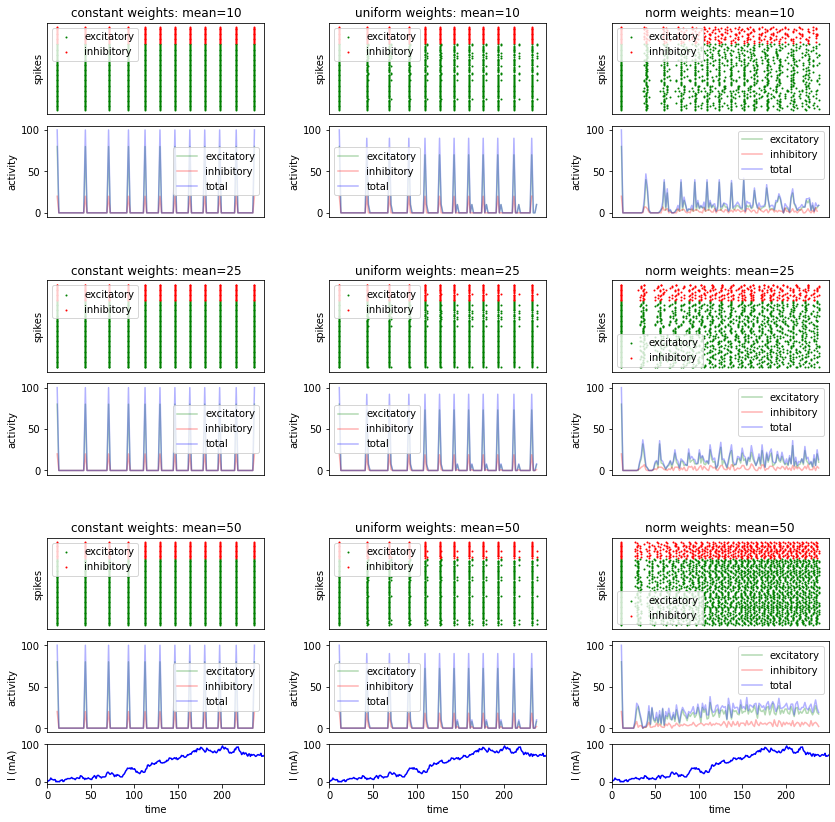

In [32]:
plt.figure(figsize=(14,14))
p = Plotter([
    ['s11','s21','s31'],
    ['s11','s21','s31'],
    ['a11','a21','a31'],
    ['a11','a21','a31'],
    [None,None,None],
    ['s12','s22','s32'],
    ['s12','s22','s32'],
    ['a12','a22','a32'],
    ['a12','a22','a32'],
    [None,None,None],
    ['s13','s23','s33'],
    ['s13','s23','s33'],
    ['a13','a23','a33'],
    ['a13','a23','a33'],
    ['i13','i23','i33'],
], wspace=0.3, hspace=0.3)
I = [0]
for i in range(time-1):
    I.append(abs(I[-1]+np.random.normal(.1, 3)))

for i,(k,v) in enumerate({"constant weights":constant_weights,
                         "uniform weights":uniform_weights,
                         "norm weights":norm_weights}.items()):
    for j,mean in enumerate([10,25,50]):
        population_behaviour(LIFPopulation, I, p, postfix=str(i+1)+str(j+1),
                             name=k+": mean="+str(mean),
                             cd=(j==2),
                             w=v,
                             wmean=mean,
                             wstd=10,
                             connectivity=internal_rfnopp_connectivity,
                             connections_rate=.2)
p.show()

<div dir='rtl'>
<br/>
در نمودار‌های بالا، نتایج زیر قابل روئیت است:
<br/>
    - با توزیع یکنواخت، فارغ از اندازه وزن‌ها، نورون‌های جامعه همگی هماهنگ عمل می‌کنند چرا که همه ورودی دقیقا یکسانی دریافت می‌کنند (همه نورون‌ها جریان ورودی یکسانی را با وزن یکسانی جابجا می‌کنند).
<br/>
    - در توزیع‌های تصادفی، با افزایش اندازه وزن‌ها، تأثیر برهمکنش‌های نورون‌ها بیشتر شده و درنتیجه از نظم جامعه کاسته می‌شود.
<br/>
    - توزیع نرمال بی‌نظمی بیشتری ایجاد می‌کند چرا که ورودی نورون‌های مختلف تفاوت زیادی را شاهد خواهد بود.
<br/>
    با توجه به آنکه هر چه عوامل تصادفی بیشتر می‌شوند، پراکندگی فعالیت جامعه هم بیشتر می‌شود، انتظار می‌رود با افزایش واریانس شاهد پراکندگی بیشتر باشیم. این مسئله را بررسی می‌کنیم:
</div>

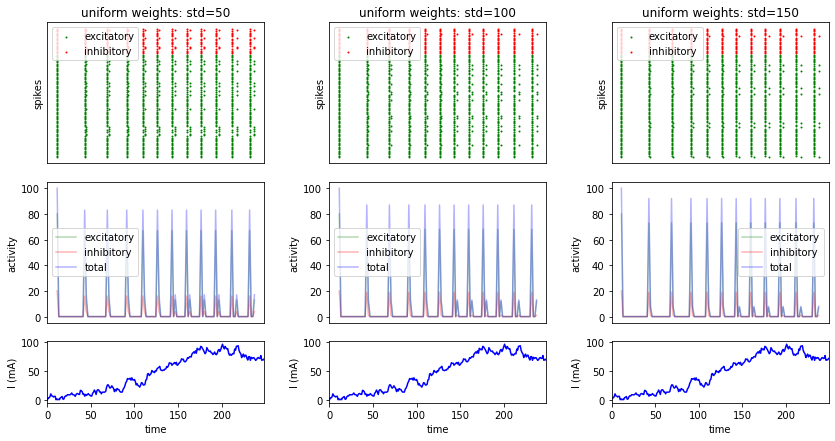

In [38]:
plt.figure(figsize=(14,7))
p = Plotter([
    ['s1','s2','s3'],
    ['s1','s2','s3'],
    ['a1','a2','a3'],
    ['a1','a2','a3'],
    ['i1','i2','i3'],
], wspace=0.3, hspace=0.3)

for j,std in enumerate([50,100,150]):
    population_behaviour(LIFPopulation, I, p, postfix=str(j+1),
                         name="uniform weights: std="+str(std),
                         w=uniform_weights,
                         wmean=200,
                         std=std,
                         connectivity=internal_rfnopp_connectivity,
                         connections_rate=.2)
p.show()

<div dir='rtl'>
<br/>
همانطور که شاهد هستیم، بی‌تأثیر است. دلیل این امر آن است که میانگین جریان ورودی به هر نورون تقریبا ثابت است و با توجه به تعداد زیاد نورون‌های جامعه، این تقریب به برابری میل می‌کند.
</div>

<a id='4'></a>
<div dir='rtl'>
    <h2>4. تغییرات ثابت‌زمانی $tau_s$</h2>
</div>

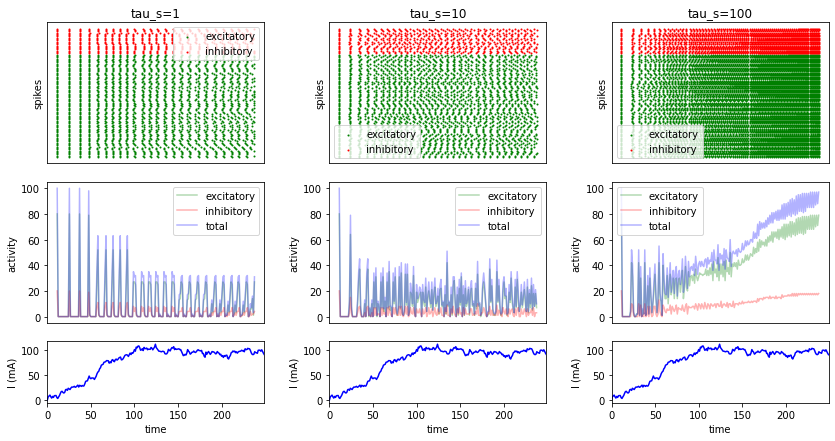

In [44]:
plt.figure(figsize=(14,7))
p = Plotter([
    ['s1','s2','s3'],
    ['s1','s2','s3'],
    ['a1','a2','a3'],
    ['a1','a2','a3'],
    ['i1','i2','i3'],
], wspace=0.3, hspace=0.3)
I = [0]
for i in range(time-1):
    I.append(abs(I[-1]+np.random.normal(.1, 3)))

for j,tau_s in enumerate([1,10,100]):
    population_behaviour(LIFPopulation, I, p, postfix=str(j+1),
                         name="tau_s="+str(tau_s),
                         tau_s=tau_s,
                         w=norm_weights,
                         wmean=25,
                         std=5,
                         connectivity=internal_rfnopp_connectivity,
                         connections_rate=.2)
p.show()

<div dir='rtl'>
<br/>
    به سادگی می‌توان مشاهده کرد که با افزایش ثابت زمانی، فعالیت جامعه افزایش پیدا می‌کند. این مسئله مورد انتظار است چرا که افزایش ثابت زمانی به معنای افزایش ماندگاری اثر اسپایک‌های قدیمی است که باعث می‌شود برهمکنش نورون‌ها اثر بیشتری داشته باشد و فعالیت جامعه افزایش پیدا کند (توجه کنید که تعداد نورون‌های تحریکی بیشتر است).
</div>